https://www.tensorflow.org/lite/tutorials/model_maker_object_detection#prerequisites

#ถ้า run ข้างล่างไม่ได้ ก็ run อันนี้ก่อน

!pip install -q tensorflow==2.5.0
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

In [8]:
import numpy as np
import os
import tensorflow as tf

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

In [3]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'dot']

label = ['0', '1'.....]

In [4]:
spec = model_spec.get('efficientdet_lite1')

In [5]:
spec.model_name

'efficientdet-lite2'

In [ ]:
xml_palt = 'C:\\Users\\wit_w\\OneDrive\\Desktop\\code\\Deep Learnig\\Recording Handwritten Digit\\TfLite\\'

In [ ]:
img_palt = 'C:\\Users\\wit_w\\OneDrive\\Desktop\\code\\Deep Learnig\\Recording Handwritten Digit\\TfLite\\'

In [6]:
dataloader = object_detector.DataLoader.from_pascal_voc(xml_palt, img_palt, labels)

INFO:tensorflow:Cache will be stored in C:\Users\wit_w\AppData\Local\Temp\tmprrv6xft7 with prefix filename ff879fa39ae931d75ac1c806b4993be9. Cache_prefix is C:\Users\wit_w\AppData\Local\Temp\tmprrv6xft7\ff879fa39ae931d75ac1c806b4993be9
INFO:tensorflow:On image 0
INFO:tensorflow:On image 100


In [7]:
model = object_detector.create(dataloader, model_spec=spec, epochs=30, batch_size=10, train_whole_model=True)

INFO:tensorflow:Retraining the models...
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Epoch 1/30
20/20 [==============================] - 296s 12s/step - det_loss: 1.8376 - cls_loss: 1.1946 - box_loss: 0.0129 - reg_l2_loss: 0.0775 - loss: 1.9151 - learning_rate: 0.0102 - gradient_norm: 2.2424
Epoch 2/30
20/20 [==============================] - 200s 10s/step - det_loss: 1.6145 - cls_loss: 1.1571 - box_loss: 0.0091 - reg_l2_loss: 0.0775 - loss: 1.6920 - learning_rate: 0.0124 - gradient_norm: 2.0846
Epoch 3/30
20/20 [==============================] - 214s 11s/step - det_loss: 1.3691 - cls_loss: 1.0163 - box_loss: 0.0071 - reg_l2_loss: 0.0775 - loss: 1.4466 - learning_rate: 0.0123 - gradient_norm: 1.9213
Epoch 4/30
 7/20 [=========>....................] - ETA: 2:15 - det_loss: 1.2557 - cls_loss: 0.8939 - box_loss: 0.0072 - reg_l2_loss: 0.0776 - loss: 1.3333 - learning_rate: 0.0121 - gradient_norm: 1.9152

KeyboardInterrupt: 

In [ ]:
model.export(export_dir='./model')

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

image = np.array(Image.open('test_img.jpg').resize((320,320)))
plt.imshow(image)

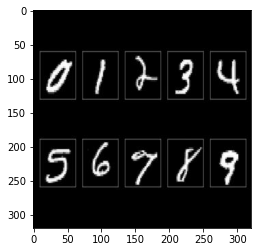

In [11]:
image = np.array(Image.open('test_img.jpg'))
plt.imshow(image)

In [12]:
tflite_model_file = 'model/model.tflite'

In [13]:
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)

interpreter.resize_tensor_input()

In [15]:
interpreter.allocate_tensors()

In [16]:
input_details = interpreter.get_input_details()

In [17]:
output_details = interpreter.get_output_details()

In [18]:
image.shape

(320, 320, 3)

In [19]:
interpreter.set_tensor(input_details[0]['index'], image.reshape(1,320,320,3))

In [20]:
interpreter.invoke()

In [ ]:
output_details

In [21]:
detection_boxes = interpreter.get_tensor(output_details[0]['index'])
print(detection_boxes)

[[[0.20516863 0.46118855 0.36467263 0.57154965]
  [0.59630847 0.26672035 0.73892784 0.3562324 ]
  [0.22084576 0.05945025 0.37861973 0.17102142]
  [0.2365998  0.2922481  0.3613798  0.34194377]
  [0.62545824 0.6524383  0.7849506  0.76161826]
  [0.63351476 0.8541547  0.8118894  0.95907784]
  [0.6564399  0.46907777 0.79751253 0.5646079 ]
  [0.21518967 0.2619566  0.41183075 0.35816988]
  [0.6388241  0.05071831 0.802987   0.18290369]
  [0.22553457 0.6446407  0.39946544 0.7394788 ]
  [0.22468592 0.8349801  0.3709491  0.94775814]
  [0.65374506 0.87448484 0.7758508  0.9447703 ]
  [0.67205274 0.26442987 0.76452816 0.3663606 ]
  [0.6790361  0.865833   0.7959638  0.92755085]
  [0.19262831 0.43818986 0.32106227 0.53938955]
  [0.27811927 0.28749233 0.38768888 0.33406073]
  [0.26867077 0.47891724 0.36282882 0.56070685]
  [0.6408555  0.4398182  0.75735885 0.5454993 ]
  [0.2510415  0.6653881  0.37855443 0.7291446 ]
  [0.18785328 0.02545751 0.40857542 0.18843126]
  [0.7124333  0.8417979  0.811119   0.95

In [22]:
detection_classes = interpreter.get_tensor(output_details[1]['index'])
print(detection_classes)

[[5. 6. 1. 1. 1. 1. 9. 1. 3. 3. 2. 1. 0. 1. 5. 1. 5. 9. 1. 9. 3. 8. 5. 1.
  8.]]


In [23]:
detection_scores = interpreter.get_tensor(output_details[2]['index'])
print(detection_scores)

[[0.6015625  0.4375     0.4296875  0.34375    0.30859375 0.30859375
  0.28125    0.2734375  0.25       0.234375   0.22265625 0.21484375
  0.21484375 0.21484375 0.18359375 0.16015625 0.1484375  0.140625
  0.1328125  0.125      0.1171875  0.1171875  0.11328125 0.11328125
  0.109375  ]]


In [ ]:
detection_boxes = interpreter.get_tensor(output_details[0]['index'])
detection_classes = interpreter.get_tensor(output_details[1]['index'])
detection_scores = interpreter.get_tensor(output_details[2]['index'])
num_boxes = interpreter.get_tensor(output_details[3]['index'])
for i in range(int(num_boxes[0])):
    if detection_scores[0, i] > .5:
        class_id = detection_classes[0, i]
        print(class_id)

In [24]:
import cv2

In [25]:
def draw_rect(image, box):
    h, w, c = image.shape
    y_min = int(max(1, (box[0] * h)))
    x_min = int(max(1, (box[1] * w)))
    y_max = int(min(h, (box[2] * h)))
    x_max = int(min(w, (box[3] * w)))

    # draw a rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 4)


In [26]:
detection_boxes[0, 0]

array([0.20516863, 0.46118855, 0.36467263, 0.57154965], dtype=float32)

In [27]:
draw_rect(image, detection_boxes[0, 0])

In [28]:
draw_rect(image, detection_boxes[0, 1])

In [29]:
print(detection_classes)

[[5. 6. 1. 1. 1. 1. 9. 1. 3. 3. 2. 1. 0. 1. 5. 1. 5. 9. 1. 9. 3. 8. 5. 1.
  8.]]


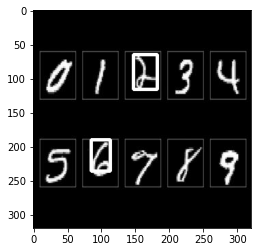

In [30]:
plt.imshow(image)

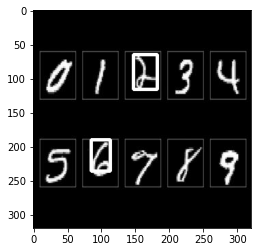

In [31]:
plt.imshow(image)

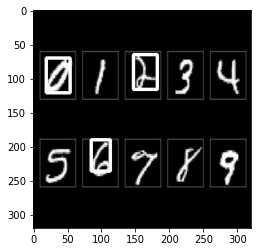

In [32]:
draw_rect(image, detection_boxes[0, 2])
plt.imshow(image)

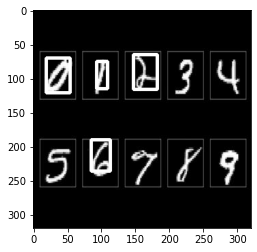

In [33]:
draw_rect(image, detection_boxes[0, 3])
plt.imshow(image)